<a href="https://colab.research.google.com/github/vedant-jad99/ML_Projects/blob/master/ConvNet1_hwdr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from tensorflow.keras.models import Sequential as Seq 
from tensorflow.keras import initializers
from tensorflow.keras.losses import CategoricalCrossentropy as categorical_crossentropy
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

5


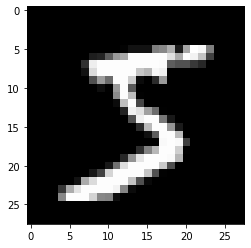

In [0]:
plt.imshow(X_train[0], cmap= 'gray')
print(y_train[0])

In [0]:
def model(filter_arr, k_size, input_shape):
  (f1, f2, f3) = filter_arr

  model = Seq()
  model.add(Conv2D(filters=f1, kernel_size=(k_size, k_size), padding='same', activation= 'relu', kernel_initializer= initializers.glorot_uniform(seed= 0), input_shape= input_shape))
  model.add(MaxPool2D(strides= (2, 2)))
  model.add(Conv2D(filters=f2, kernel_size=(k_size, k_size), padding='same', activation= 'relu', kernel_initializer= initializers.glorot_uniform(seed= 0)))  
  model.add(MaxPool2D(strides=(1, 1)))
  model.add(Conv2D(filters=f3, kernel_size=(k_size, k_size), strides=(2, 2), padding='valid', activation= 'sigmoid', kernel_initializer= initializers.glorot_uniform(seed= 0)))
  model.add(Flatten())
  model.add(Dense(units= 128, activation= 'relu'))
  model.add(Dense(units= 10, activation= 'softmax'))

  return model

In [0]:
filter_arr = (16, 64, 128)
k_size = 5
X_train = X_train.astype('float64')
X_train /= 255
X_test = X_test.astype('float64')
X_test /= 255
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[1], 1))
input_shape = (28, 28, 1)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(X_train.shape, X_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [0]:
model = model(filter_arr, k_size, input_shape)
model.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics= ['accuracy'])

In [0]:
model.fit(X_train, y_train, batch_size= 64, epochs= 10)

Epoch 1/10
938/938 [==============================] - 9s 10ms/step - loss: 0.2523 - accuracy: 0.9184
Epoch 2/10
938/938 [==============================] - 9s 10ms/step - loss: 0.0514 - accuracy: 0.9844
Epoch 3/10
938/938 [==============================] - 9s 10ms/step - loss: 0.0374 - accuracy: 0.9881
Epoch 4/10
938/938 [==============================] - 9s 10ms/step - loss: 0.0278 - accuracy: 0.9913
Epoch 5/10
938/938 [==============================] - 9s 10ms/step - loss: 0.0228 - accuracy: 0.9926
Epoch 6/10
938/938 [==============================] - 9s 10ms/step - loss: 0.0178 - accuracy: 0.9944
Epoch 7/10
938/938 [==============================] - 9s 10ms/step - loss: 0.0148 - accuracy: 0.9954
Epoch 8/10
938/938 [==============================] - 9s 10ms/step - loss: 0.0131 - accuracy: 0.9958
Epoch 9/10
938/938 [==============================] - 9s 10ms/step - loss: 0.0113 - accuracy: 0.9961
Epoch 10/10
938/938 [==============================] - 9s 10ms/step - loss: 0.0091 - accura

In [0]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 5ms/step - loss: 0.0350 - accuracy: 0.9906


[0.034951020032167435, 0.9905999898910522]

Start index: 1239
Count: 7


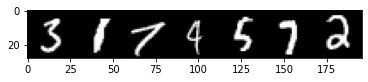

In [0]:
start_index = int(input("Start index: "))
imag_count = int(input("Count: "))
if start_index + imag_count < X_test.shape[0]:
  final = X_test[start_index].reshape((X_test.shape[1], X_test.shape[2]))

  for i in range(1, imag_count):
    arr = X_test[start_index + i].reshape((X_test.shape[1], X_test.shape[2]))
    final = np.concatenate((final, arr), axis= 1)

  plt.imshow(final, cmap= 'gray')

In [0]:
arr = X_test[start_index:start_index + imag_count]
out = model.predict(arr)
for i in out:
  print(i.argmax(), end= ", ")

3, 1, 7, 9, 5, 7, 2, 

In [0]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 14, 14, 64)        25664     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 5, 5, 128)         204928    
_________________________________________________________________
flatten_12 (Flatten)         (None, 3200)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 128)             